In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pandas as pd
import cv2 
import os
import itertools

#importing required libraries for image feature extraction
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure


In [16]:
from PIL import Image
import seaborn as sns
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
levels = ['Normal', 'Covid']
path = 'C:/Users/Hp/Documents/Uni-Documents/Semester-06/Machine Learning/Lab/Pycharm/COVID/testing'
data_dir = os.path.join(path)

data = []
for id, level in enumerate(levels):
    for file in os.listdir(os.path.join(data_dir, level)):
        data.append(['{}/{}'.format(level, file), level])

data = pd.DataFrame(data, columns = ['image_file', 'corona_result'])

data['path'] = path + '/' + data['image_file']
data['corona_result'] = data['corona_result'].map({'Normal': 'Negative', 'Covid': 'Positive'})


data.head()

,image_file,corona_result,path
0,Normal/Normal-1.png,Negative,C:/Users/Hp/Documents/Uni-Documents/Semester-0...
1,Normal/Normal-10.png,Negative,C:/Users/Hp/Documents/Uni-Documents/Semester-0...
2,Normal/Normal-100.png,Negative,C:/Users/Hp/Documents/Uni-Documents/Semester-0...
3,Normal/Normal-1000.png,Negative,C:/Users/Hp/Documents/Uni-Documents/Semester-0...
4,Normal/Normal-101.png,Negative,C:/Users/Hp/Documents/Uni-Documents/Semester-0...


In [18]:
print('Number of Total Samples: %d'%(data.isnull().value_counts()))


Number of Total Samples: 2000


In [19]:

df = pd.DataFrame()
df['corona_result'] = ['Positive', 'Negative']
df['Count'] = [len(data[data['corona_result'] == 'Positive']), len(data[data['corona_result'] == 'Negative'])]
df = df.sort_values(by = ['Count'], ascending = False)

fig = px.bar(df, x = 'corona_result', y = 'Count', 
             color = "corona_result", text_auto='', width = 600, 
             color_discrete_sequence = ["orange", "purple"],
             template = 'plotly_dark')

fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_traces(textfont_size = 12, textangle = 0, textposition = "outside", cliponaxis = False)

fig.show()

In [20]:
all_data = []

# Storing images and their labels into a list for further Train Test split

for i in range(len(data)):
    image = cv2.imread(data['path'][i])
    image = cv2.resize(image, (128, 256)) 
    label = 1 if data['corona_result'][i] == "Positive" else 0
    all_data.append([image, label])

In [21]:
x = []
y = []

for image, label in all_data:
    x.append(image)
    y.append(label)

# Converting to Numpy Array    
x = np.array(x)
y = np.array(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 42)

print(x_train.shape, x_test.shape, x_val.shape, y_train.shape, y_test.shape, y_val.shape)

(1440, 256, 128, 3) (400, 256, 128, 3) (160, 256, 128, 3) (1440,) (400,) (160,)


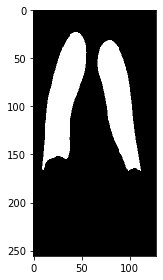

In [22]:
imshow(x_train[0])

In [23]:
allFD = []
allHogImages = []
for img in x_train:
    #creating hog features 
    fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8), 
                        cells_per_block=(2, 2), visualize=True, multichannel=True)
    allFD.append(fd)
    allHogImages.append(hog_image)
fd.shape

(16740,)

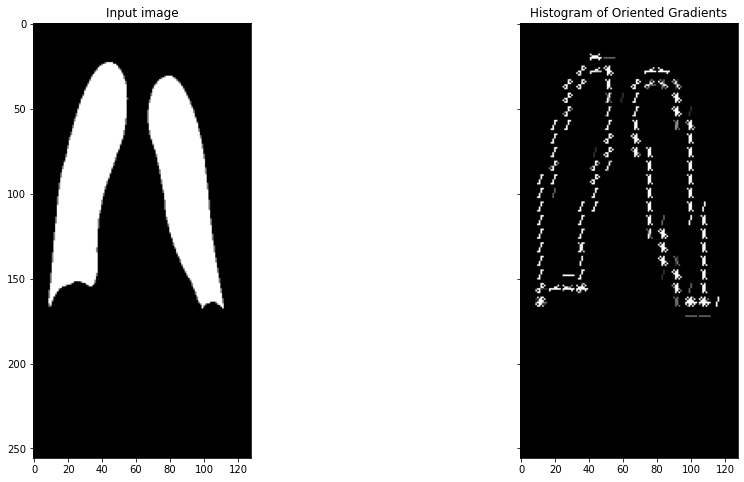

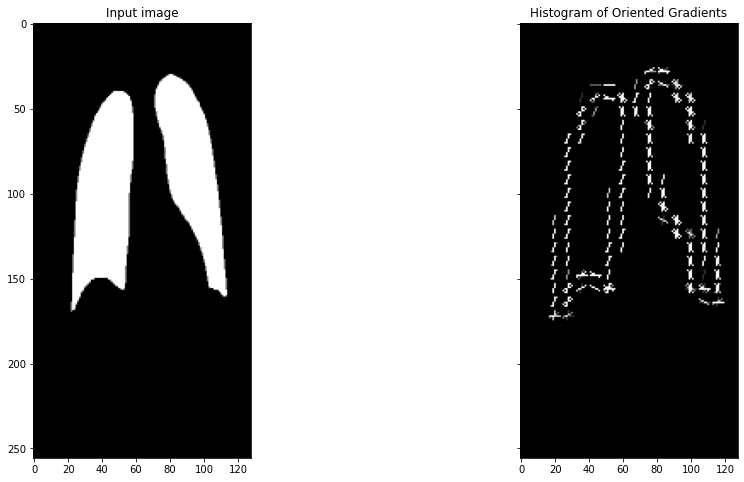

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(x_train[0], cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(allHogImages[0], in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(x_train[1], cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(allHogImages[1], in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [24]:
# storing allFeatures Extracted in x_train
training_data = x_train
x_train = allFD

In [25]:
allFDtesting = []
allHogImagestesting = []
for img in x_test:
    #creating hog features 
    fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8), 
                        cells_per_block=(2, 2), visualize=True, multichannel=True)
    allFDtesting.append(fd)
    allHogImagestesting.append(hog_image)
# fd.shape

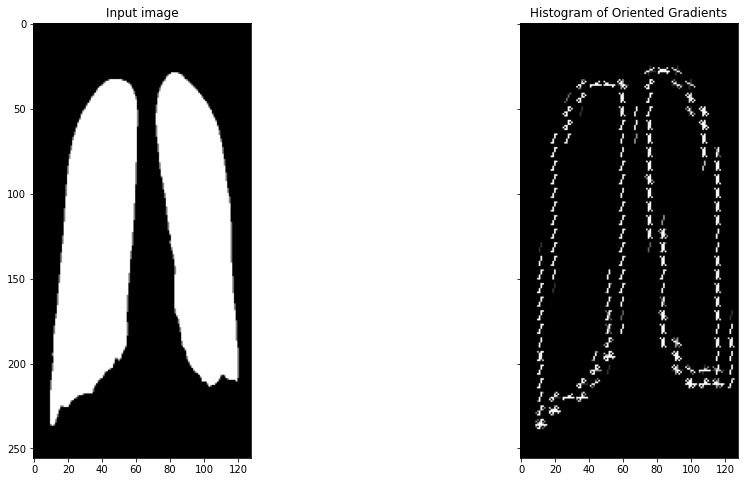

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(x_test[0], cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(allHogImagestesting[0], in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [26]:
alltestingdata = x_test
x_test = allFDtesting

# Built in code for confusion matrix 

In [27]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

#  SVM

In [28]:
# *********************SVM**************************
clf = svm.SVC(kernel='rbf', random_state=1, gamma='auto', C=1.0)
clf.fit(x_train, y_train)

SVC(gamma='auto', random_state=1)

In [29]:
y_TrainPred = clf.predict(x_train)

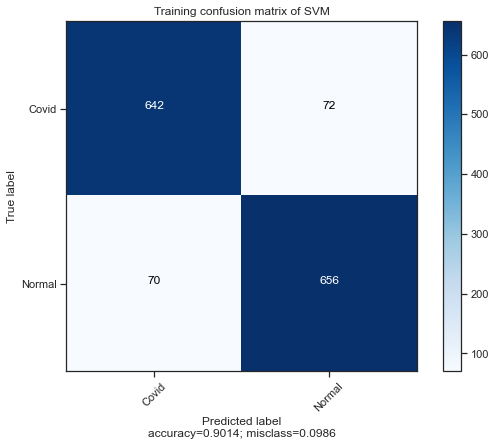

In [48]:
from sklearn.metrics import confusion_matrix

cm =  confusion_matrix(y_train, y_TrainPred)

plot_confusion_matrix(cm = cm, 
                      normalize    = False,
                      target_names = ['Covid','Normal'],
                      title        = "Training confusion matrix of SVM")

In [30]:
# testing
y_TrainPred = clf.predict(x_test)

print(confusion_matrix(y_test, y_TrainPred))
print('The accuracy of the SVM in testing is: ', metrics.accuracy_score(y_TrainPred,y_test))
# print(classification_report(y_train, y_TrainPred))



[[179  20]
 [ 17 184]]
The accuracy of the SVM in testing is:  0.9075


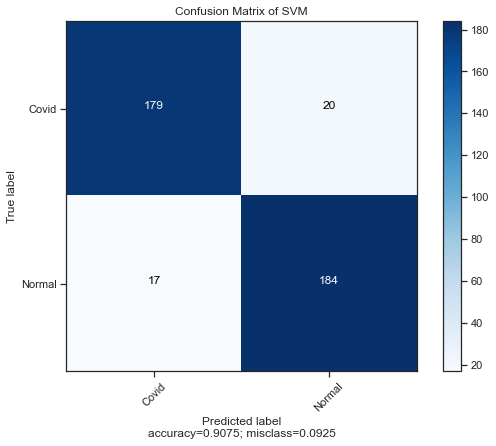

In [46]:
from sklearn.metrics import confusion_matrix

cm =  confusion_matrix(y_test, y_TrainPred)

plot_confusion_matrix(cm = cm, 
                      normalize    = False,
                      target_names = ['Covid','Normal'],
                      title        = "Confusion Matrix of SVM")

In [31]:
result = []
class1 = (y_test != y_TrainPred).sum()
class1 = ((len(y_test) - class1)/len(y_TrainPred)) * 100
result.append(class1)


# Decision tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="entropy", random_state=42,max_depth=3, min_samples_leaf=5)
clf_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)

In [51]:
y_TrainPred = clf_model.predict(x_train)

print(confusion_matrix(y_train, y_TrainPred))
print('The accuracy of the Decision Tree in Training is: ', metrics.accuracy_score(y_TrainPred,y_train))

[[575 139]
 [ 50 676]]
The accuracy of the Decision Tree in Training is:  0.86875


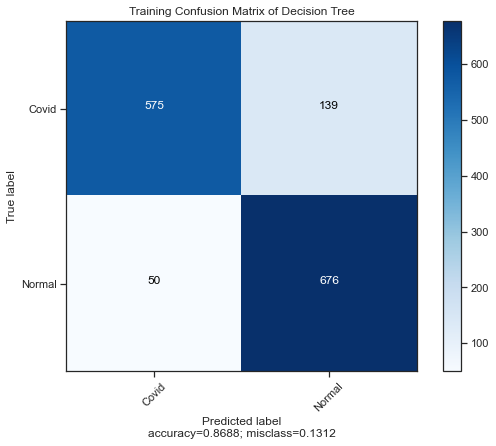

In [56]:
from sklearn.metrics import confusion_matrix

cm =  confusion_matrix(y_train, y_TrainPred)

plot_confusion_matrix(cm = cm, 
                      normalize    = False,
                      target_names = ['Covid','Normal'],
                      title        = "Training Confusion Matrix of Decision Tree")

In [33]:
y_pred = clf_model.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print('The accuracy of the SVM in is: ', metrics.accuracy_score(y_test,y_pred))

[[157  42]
 [ 21 180]]
The accuracy of the SVM in is:  0.8425


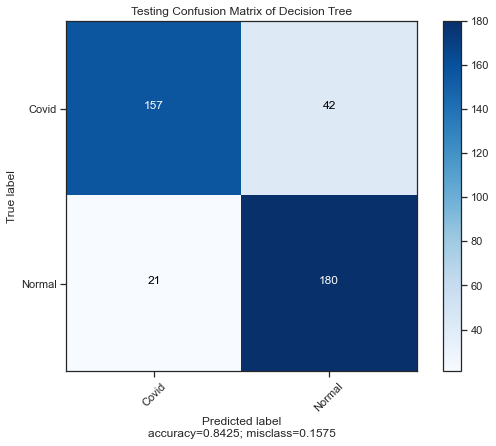

In [57]:
from sklearn.metrics import confusion_matrix

cm =  confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm = cm, 
                      normalize    = False,
                      target_names = ['Covid','Normal'],
                      title        = "Testing Confusion Matrix of Decision Tree")

In [34]:
class1 = (y_test != y_pred).sum()
class1 = ((len(y_test) - class1)/len(y_pred)) * 100
result.append(class1)

# KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [59]:
y_TrainPred = classifier.predict(x_train)

print(confusion_matrix(y_train, y_TrainPred))
print('The accuracy of the SVM in Training is: ', metrics.accuracy_score(y_TrainPred,y_train))

[[683  31]
 [ 27 699]]
The accuracy of the SVM in Training is:  0.9597222222222223


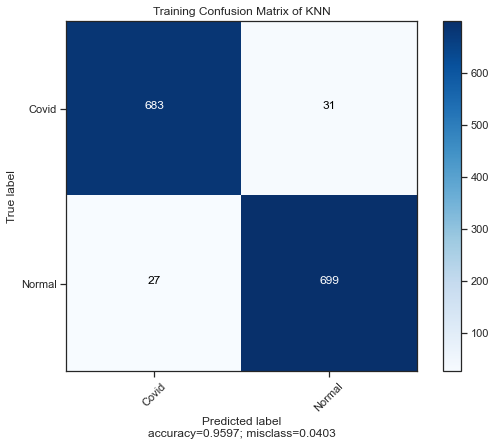

In [61]:
from sklearn.metrics import confusion_matrix

cm =  confusion_matrix(y_train, y_TrainPred)

plot_confusion_matrix(cm = cm, 
                      normalize    = False,
                      target_names = ['Covid','Normal'],
                      title        = "Training Confusion Matrix of KNN")

In [36]:
y_pred = classifier.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print('The accuracy of the SVM in is: ', metrics.accuracy_score(y_pred,y_test))

[[189  10]
 [ 12 189]]
The accuracy of the SVM in is:  0.945


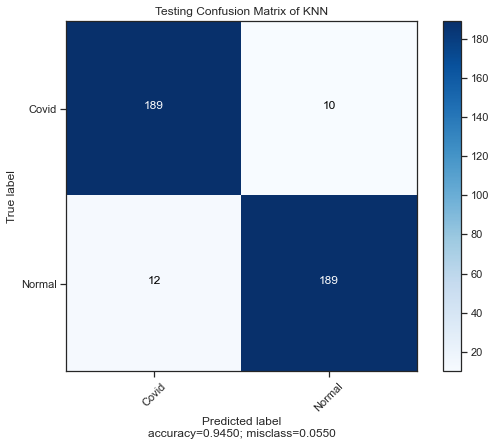

In [64]:
from sklearn.metrics import confusion_matrix

cm =  confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm = cm, 
                      normalize    = False,
                      target_names = ['Covid','Normal'],
                      title        = "Testing Confusion Matrix of KNN")

In [37]:
class1 = (y_test != y_pred).sum()
class1 = ((len(y_test) - class1)/len(y_pred)) * 100
result.append(class1)

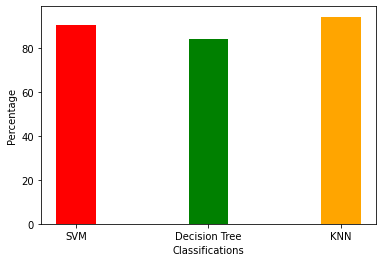

In [38]:
x = ["SVM", "Decision Tree", "KNN"]
h = result
c = ["red", "green", "orange"]
plt.bar(x,h,width=0.3, color=c)
plt.xlabel("Classifications")
plt.ylabel("Percentage")
plt.show()